In [1]:
import gym
import gym_nav
import proplot as pplt
import matplotlib.pyplot as plt
from read_experiments import *

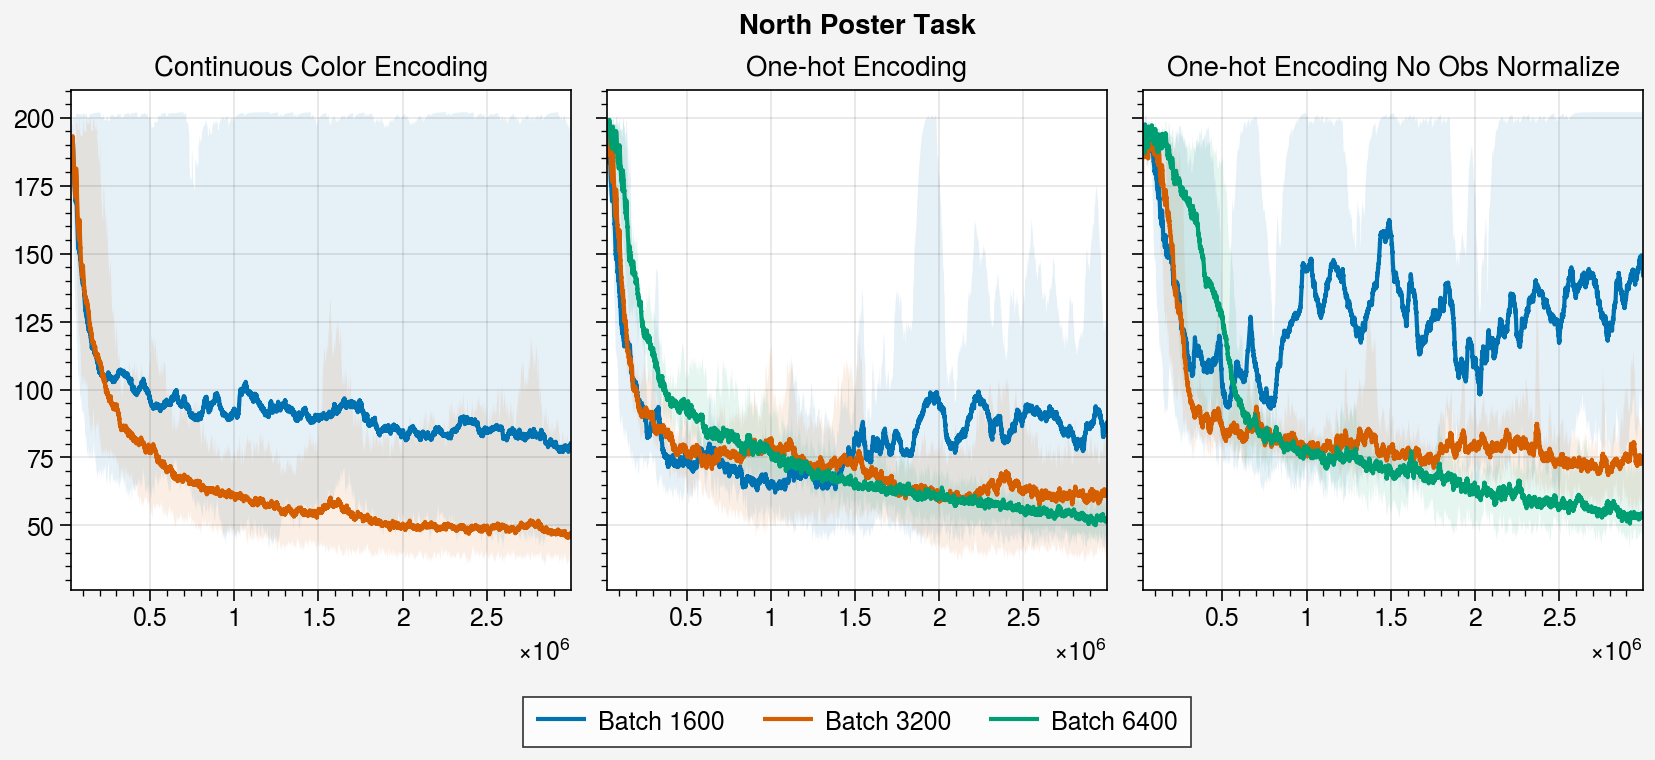

In [16]:
fig, ax = pplt.subplots(ncols=3)

batch_sizes = [16, 32, 64]
exps = ['nav_pnorth/nav_pdistal_batch{}auxnone', 'nav_pnorth/nav_pnorth_batch{}onehot',
        'nav_pnorth/nav_pnorth_batch{}onehotnovec']

for i, exp in enumerate(exps):
    lines = []
    for batch in batch_sizes:
        if i == 0 and batch == 64:
            continue
        lines.append(average_runs(exp.format(batch), 'length', ignore_first=100, ax=ax[i], label=f'Batch {batch*100}'))
        
ax.format(title=['Continuous Color Encoding', 'One-hot Encoding', 'One-hot Encoding No Obs Normalize'], suptitle='North Poster Task')
fig.legend(lines, loc='b')

# Explore tasks

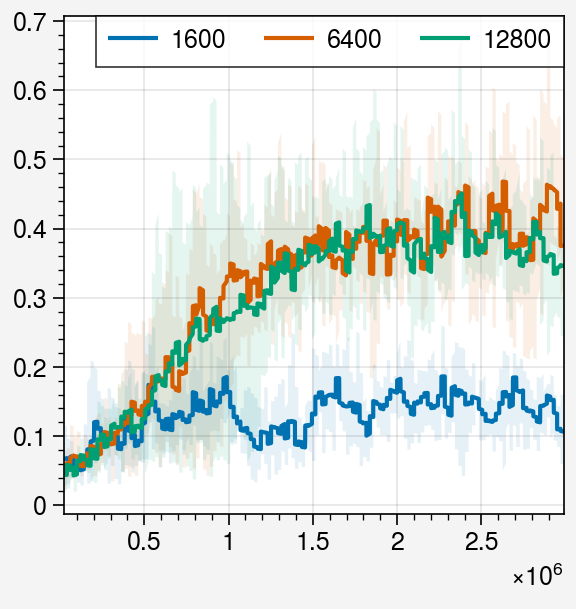

In [15]:
batch_sizes = [16, 64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}onehot', ax=ax, label=f'{batch*100}')
    
ax.legend()

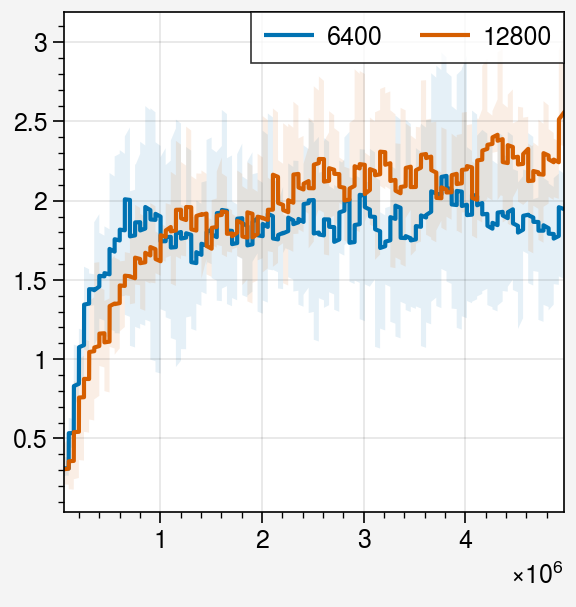

In [17]:
batch_sizes = [64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}faster', ax=ax, label=f'{batch*100}')
    
ax.legend()

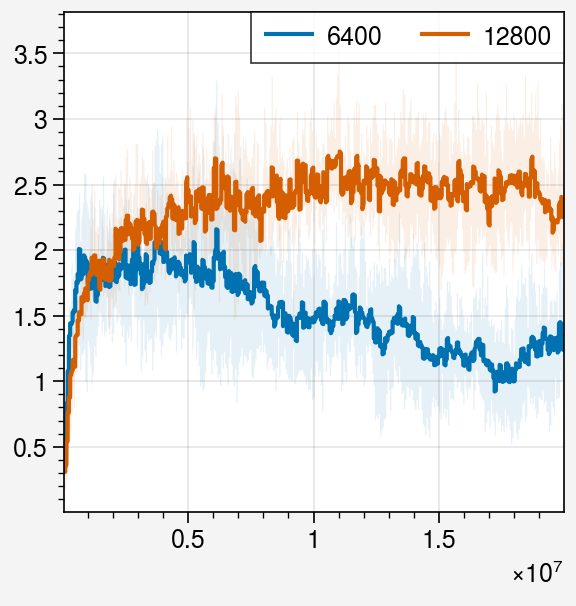

In [2]:
batch_sizes = [64, 128]
fig, ax = pplt.subplots()
for batch in batch_sizes:
    average_runs(f'nav_4wallexplore/nav_4wallexplore_batch{batch}faster20m', ax=ax, label=f'{batch*100}')
    
ax.legend()

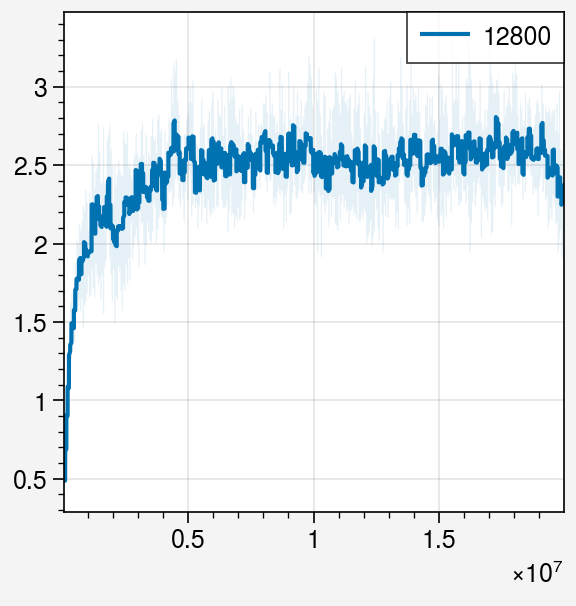

In [5]:
fig, ax = pplt.subplots()
average_runs(f'nav_4we_aux/nav_4wallexplore_batch128faster20mrewexplore', ax=ax, label=f'{batch*100}')
    
ax.legend()

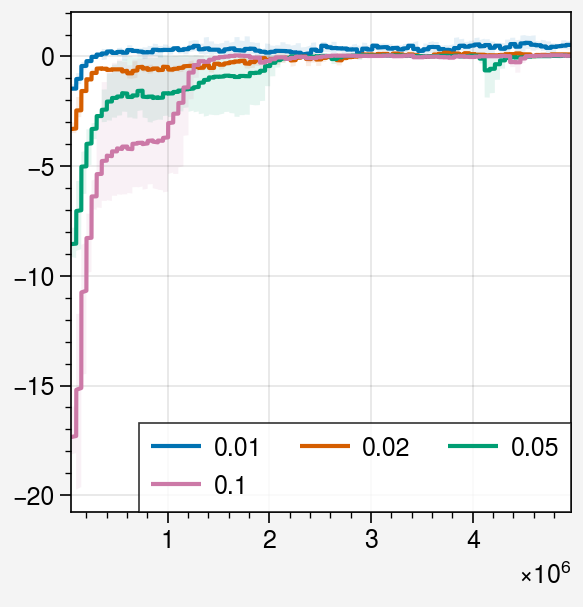

In [2]:
fig, ax = pplt.subplots()
average_runs(f'nav_4we_aux/nav_4wallexplore_batch128explorepunish', ax=ax, label='0.01')

punishment_sizes = [0.02, 0.05, 0.1]
for pun in punishment_sizes:
    exp_name = f'nav_4we_aux/nav_4wallexplore_ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    

ax.legend()

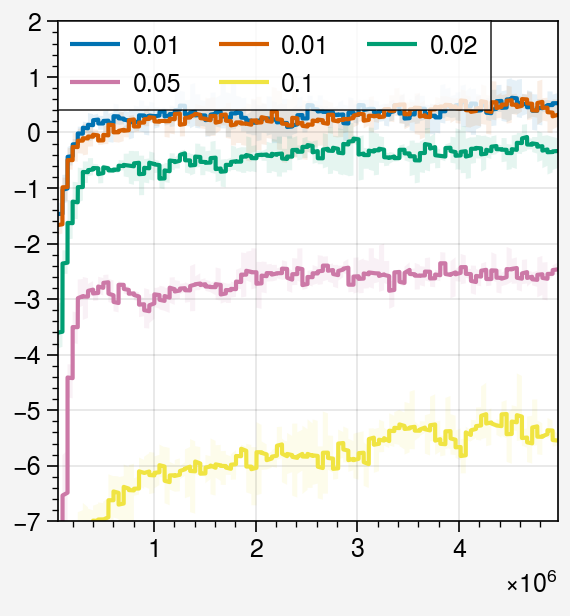

In [5]:
fig, ax = pplt.subplots()
average_runs(f'nav_4we_aux/nav_4wallexplore_batch128explorepunish', ax=ax, label='0.01')

punishment_sizes = [0.01, 0.02, 0.05, 0.1]
for pun in punishment_sizes:
    exp_name = f'4we_punish/nav_4wallexplore_ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

### Fixed punishment

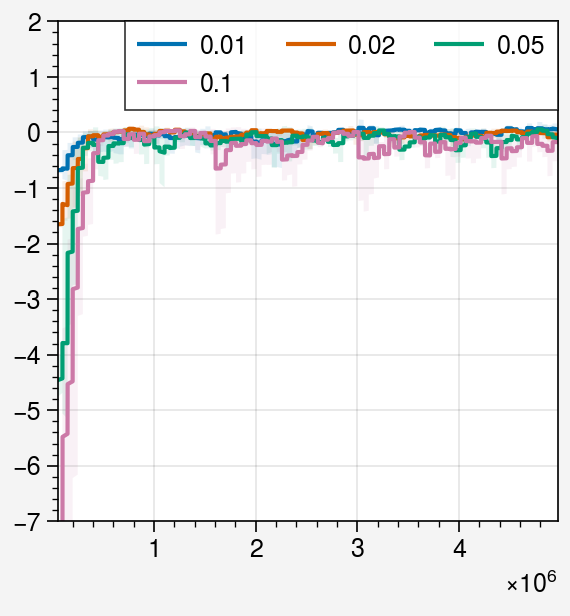

In [8]:
fig, ax = pplt.subplots()

punishment_sizes = [0.01, 0.02, 0.05, 0.1]
for pun in punishment_sizes:
    exp_name = f'4we_punish/nav_4wallexplore_2ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

### Fully connected before RNN and fixed punishment

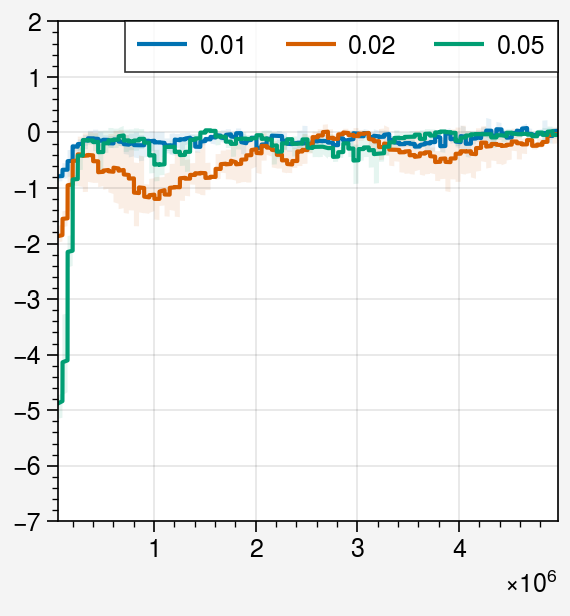

In [7]:
fig, ax = pplt.subplots()

punishment_sizes = [0.01, 0.02, 0.05]
for pun in punishment_sizes:
    exp_name = f'4wefc_punish/nav_4wefc_2ep{pun}'
    average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

### FC -> RNN and exponential punish + bonus

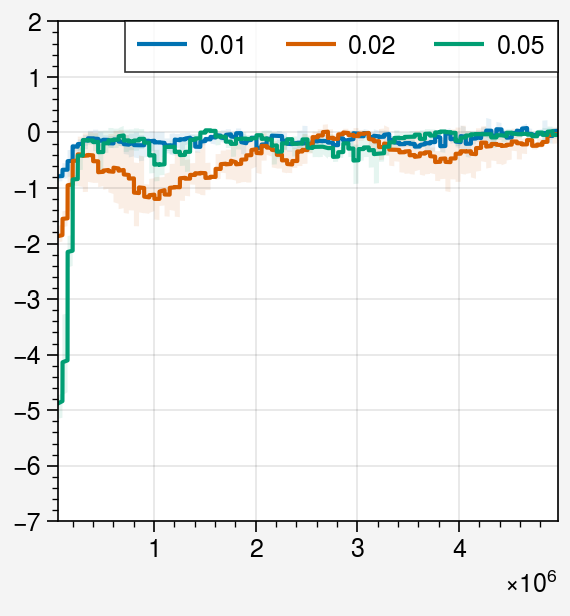

In [7]:
fig, ax = pplt.subplots()

sub_reward_sizes = [0.01, 0.02, 0.04]
punish_args = [3, 5, 7]
mults = [2, 5]


for punish_arg in punish_args:
    for mult in mults:        
        for sub_reward in sub_reward_sizes:
            exp_name = f'nav_4wefc_ep{sub_reward}mult{mult}arg{punish_arg}_t{i}'
            average_runs(exp_name, ax=ax, label=str(pun))
    
ax.format(ylim=[-7, 2])
ax.legend()

# Shortcut environment

* Once agents successfully reach the platform, they almost immediately have a fixed policy to get to the goal with 100% success rate
    * Might need to increase the randomness of starting position to prevent how much memorization occurs

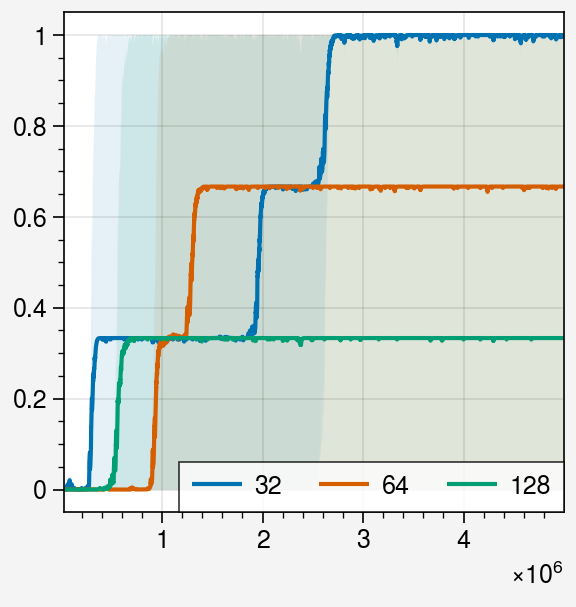

In [3]:
fig, ax = pplt.subplots()

batch_sizes = [32, 64, 128]
for batch in batch_sizes:
    exp_name = f'shortcut/shortcutnav_shortcutprob0batch{batch}'
    average_runs(exp_name, ax=ax, label=str(batch))

ax.legend()

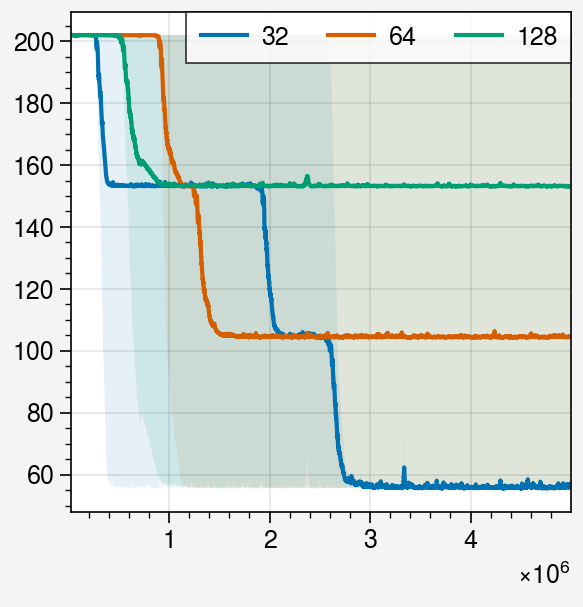

In [4]:
fig, ax = pplt.subplots()

batch_sizes = [32, 64, 128]
for batch in batch_sizes:
    exp_name = f'shortcut/shortcutnav_shortcutprob0batch{batch}'
    average_runs(exp_name, 'length', ax=ax, label=str(batch))

ax.legend()

In [5]:
batch = 32
exp_name = f'shortcut/shortcutnav_shortcutprob0batch{batch}'
xs, ys, min_x, max_x = average_runs(exp_name, 'length', ax=ax, label=str(batch), ret=True)

<a list of 1 Line2D objects>

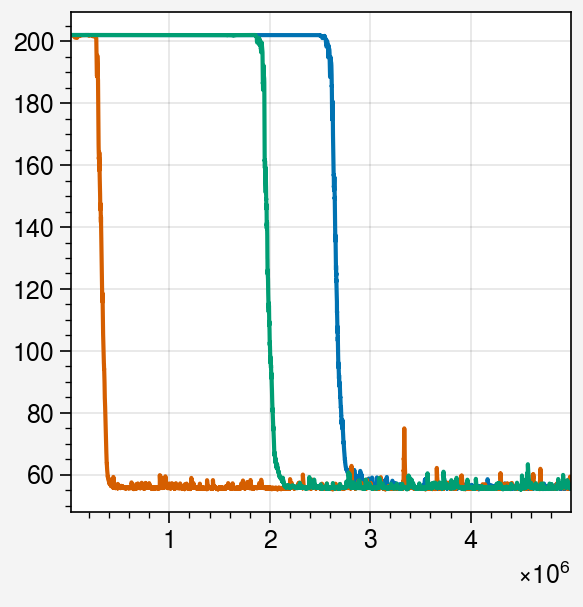

In [11]:
fig, ax = pplt.subplots()
ax.plot(xs, ys[0])
ax.plot(xs, ys[1])
ax.plot(xs, ys[2])

## Shortcut probabilities

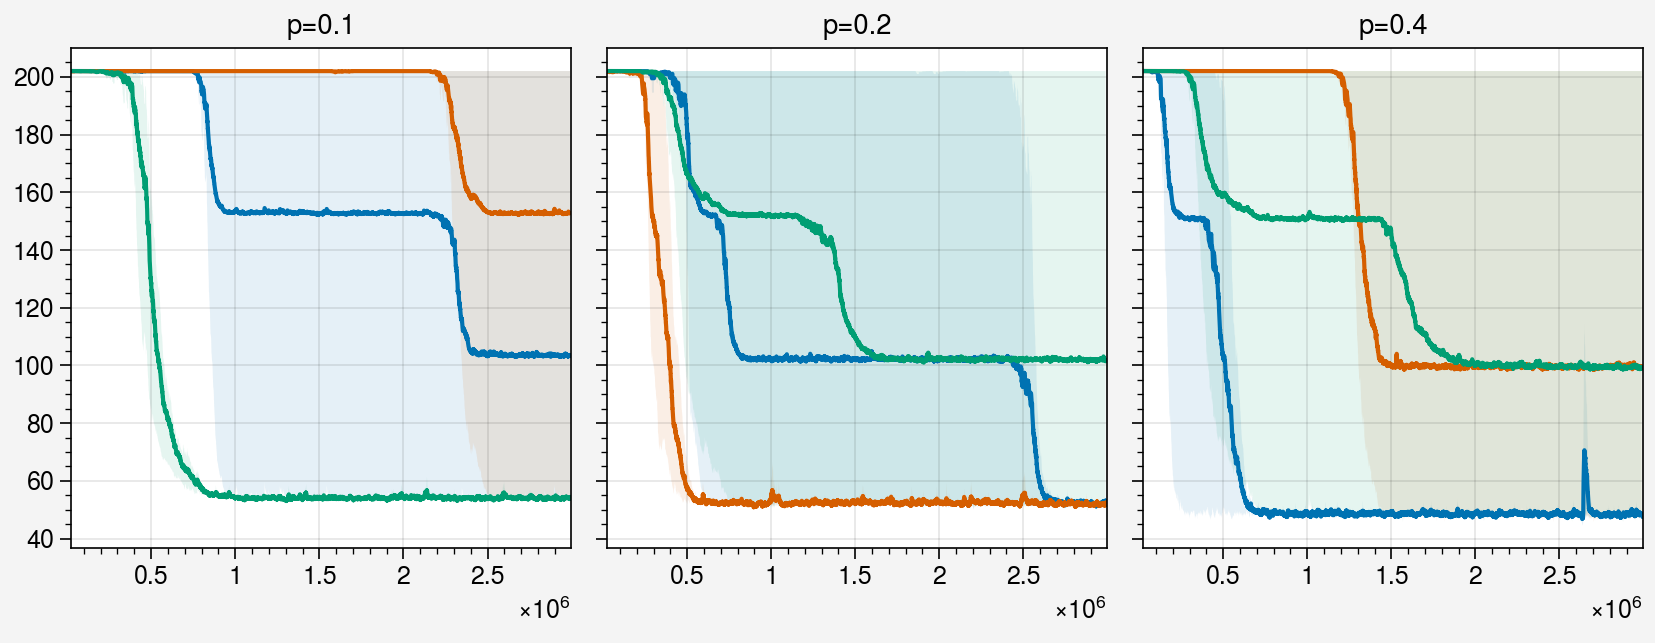

In [2]:
probs = [0.1, 0.2, 0.4]
batch_sizes = [32, 64, 128]
fig, ax = pplt.subplots(ncols=3)
for i, prob in enumerate(probs):
    lines = []
    for batch in batch_sizes:
        exp_name = f'shortcuts/shortcutnav_shortcutprob{prob}batch{batch}'
        lines.append(average_runs(exp_name, 'length', ax=ax[i], label=f'{batch}'))

ax.format(title=[f'p={prob}' for prob in probs])

Next
~~* Get some extra poster plots ready on phone~~

~~* Check performance of explore punish variations~~
~~* Change shortcut opening probability~~
~~* Add subfolder saving for runs especially since we're starting to run multiple types of experiments~~
~~* Look at performance of shortcut environment agents - why is there step performance? Maybe need to look at individual experiments~~
* Begin set up of balloon game environment?
~~* Check on differences between PPO return computation and R2D2 and maybe need to allow return computations to simply be as long as the sequences we pull from batch~~
* Later on maybe need to make some test environments and steps to manually compute returns and gradients with to make sure things are working correctly
* Set up functions for collecting activations during policy
* Set up functions to better quantify explorepunish agent performance
    * Later want to have functions that quantify exploration efficiency and memory of goal position
* Observe whether we can see representations of goal position versus self position in RNN
* Test networks with RNN after a first FC layer instead of RNN being first layer
* Better quantify shortcut performance, analyze behavior
    * Looks pretty good - would like way to quantify learning to use shortcut during training too